In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Use Numpy and Pandas to generate an array of 100 numbers from 0 to 99. Convert it
into a matrix of size 10 x 10

In [4]:
a = np.arange(100)
c = a.reshape(10,10)
c

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

1. Find the element at 3rd row 4th column


In [6]:
x = c[2,3]
print(x)

23


2. Print 21, 22, 23

In [8]:
x = c[2,1:4]
print(x)

[21 22 23]


3. Print all the rows up to row 3 and all the columns up to (and not including) the last column


In [11]:
x = c[:3,:-1]
print(x)

[[ 0  1  2  3  4  5  6  7  8]
 [10 11 12 13 14 15 16 17 18]
 [20 21 22 23 24 25 26 27 28]]


4. Print every other element in the last row  


In [13]:
x = c[-1,:]
print(x)

[90 91 92 93 94 95 96 97 98 99]


5. Print all values from the array that are greater than 90.


In [14]:
x = c[c>90]
print(x)

[91 92 93 94 95 96 97 98 99]


In [17]:
x = c[-1, 1:]
print(x)

[91 92 93 94 95 96 97 98 99]


6. Assign all values in the array that are greater than 90 to the value of 90


In [18]:
x = c[-1, 0]
print(x)

90


In [19]:
s = c[-1, 1:]
print(s)

[91 92 93 94 95 96 97 98 99]


In [20]:
c[-1, 0] = c[-1, 1:]
print(c)

ValueError: setting an array element with a sequence.

7. Copy the 10 x 10 array to another array and set all the values of copied array to 7

In [57]:
x = np.copy(c)
x = np.replace(x,7)
print(x)

AttributeError: module 'numpy' has no attribute 'replace'

 Use lambda function to find the square of the number n= (10, 20, 30, 40)   

In [23]:
x = lambda n: n**2
a = [10, 20, 30, 40]
lambda(a)
print(x)

SyntaxError: invalid syntax (<ipython-input-23-0996baf782c3>, line 3)

  Use the data set “Customer Purchasing Behaviors.csv” Apply Linear regression

mount drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('/content/drive/MyDrive/BDA_1_Sem/FML/FML_Lab/Lab_Test/Customer Purchasing Behaviors.csv')
data.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


age: The age of the customer.

annual_income: The customer's annual income (in USD).

purchase_amount: The total amount of purchases made by the customer (in USD).

purchase_frequency: Frequency of customer purchases (number of times per year).

In [30]:
a = data['age'].values
b = data['annual_income'].values
c = data['purchase_amount'].values
d = data['purchase_frequency'].values

In [58]:
a = data.iloc[:, 0].values
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Apply linear regression to analyse the relationship between the following:


(a) age and annual_income


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.25, random_state=0)

In [34]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = regressor.predict(x_test)

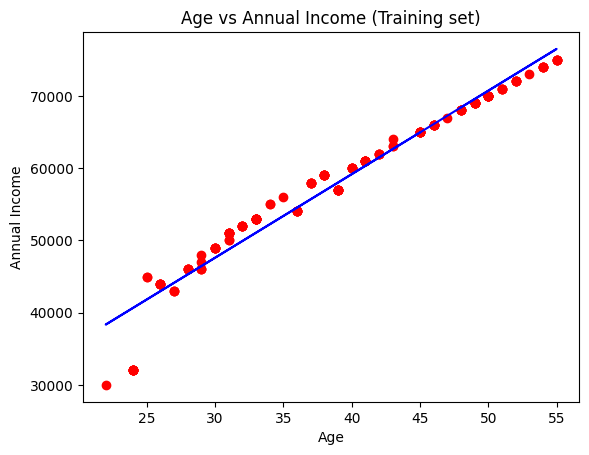

In [38]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Age vs Annual Income (Training set)')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

(b) age and purchase_amount


In [39]:
x_train, x_test, y_train, y_test = train_test_split(a, c, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(x_test)

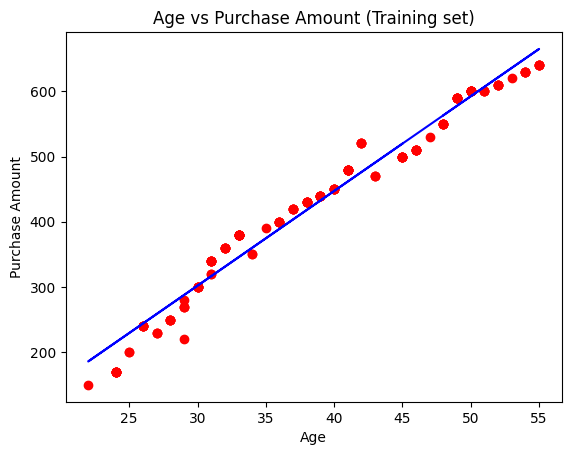

In [43]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Age vs Purchase Amount (Training set)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

(c) annual_income and purchase_amount


In [44]:
x_train, x_test, y_train, y_test = train_test_split(b, c, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = regressor.predict(x_test)

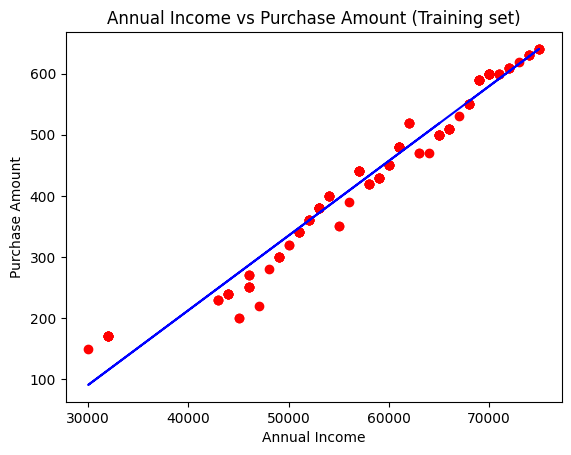

In [47]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Annual Income vs Purchase Amount (Training set)')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Amount')
plt.show()

(d) purchase_amount and purchase_frequency


In [49]:
x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = regressor.predict(x_test)

Text(0.5, 0, 'Purchase Amount')

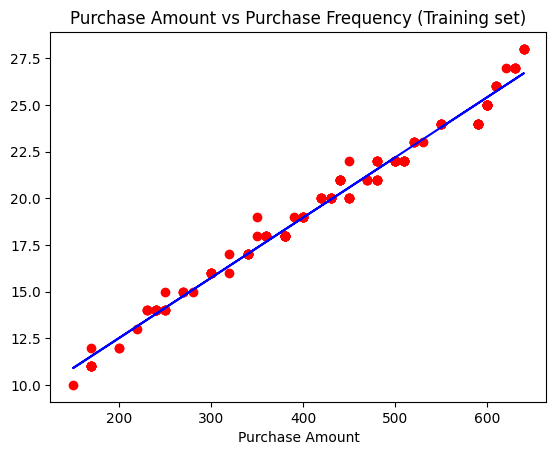

In [52]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Purchase Amount vs Purchase Frequency (Training set)')
plt.xlabel('Purchase Amount')

(e) annual_income and purchase_frequency

In [53]:
x_train,x_test,y_train,y_test=train_test_split(b,d,test_size=0.25,random_state=0)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [55]:
y_pred = regressor.predict(x_test)

Text(0.5, 0, 'Annual Income')

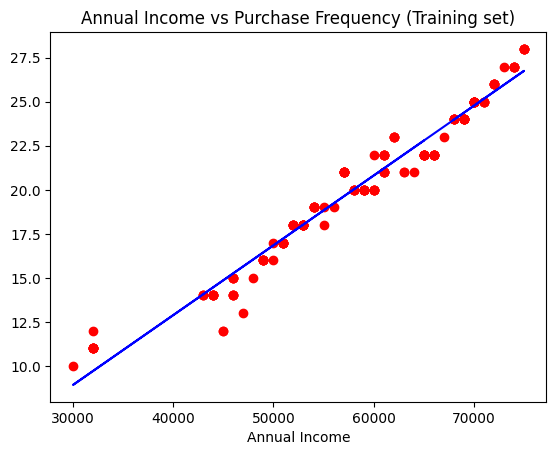

In [56]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Annual Income vs Purchase Frequency (Training set)')
plt.xlabel('Annual Income')